# Linear Regression using gradient descent algorithm

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('Salary_Data.csv')

In [3]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
X = df.iloc[:,0]
Y = df.iloc[:,1]

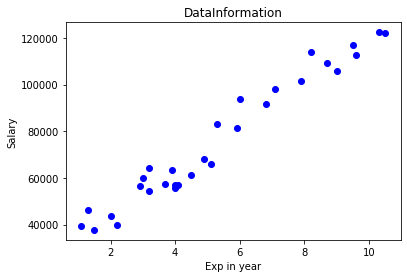

In [5]:
plt.scatter(X,Y,color='blue')
plt.title("DataInformation")
plt.xlabel('Exp in year')
plt.ylabel('Salary')
plt.show()

In [6]:
L = 0.0001 
m = 0 
c = 0 
epoches = 10000
n = len(df)

In [7]:
for i in range(epoches):
    Y_pred = m*X + c
    d_m = -2/n*sum(X*(Y-Y_pred))
    d_c = -2/n*sum(Y-Y_pred)
    m = m - L*d_m 
    c = c - L*d_c

In [8]:
m

11769.706882688291

In [9]:
c

10160.0572982789

In [10]:
Y_pred = m*X + c

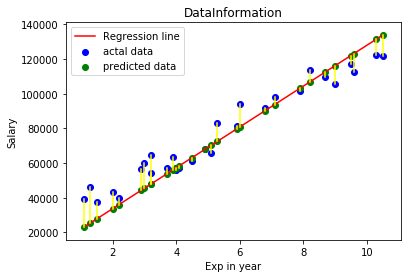

In [11]:
plt.scatter(X,Y,color='blue',label = 'actal data')
plt.plot(X,Y_pred,color='red',label='Regression line')
plt.scatter(X,Y_pred,color='green',label='predicted data')
plt.plot([X,X],[Y,Y_pred],color='yellow')
plt.title("DataInformation")
plt.xlabel('Exp in year')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [12]:
df['Prediction'] = Y_pred

In [13]:
df

,YearsExperience,Salary,Prediction
0,1.1,39343.0,23106.734869
1,1.3,46205.0,25460.676246
2,1.5,37731.0,27814.617622
3,2.0,43525.0,33699.471064
4,2.2,39891.0,36053.412440
5,2.9,56642.0,44292.207258
6,3.0,60150.0,45469.177946
7,3.2,54445.0,47823.119323
8,3.2,64445.0,47823.119323
9,3.7,57189.0,53707.972764


### Mean Absolute error

In [14]:
mae = sum(abs(Y-Y_pred))/n
mae

7378.908648355032

### Mean Squared Error

In [15]:
mse = sum((Y-Y_pred)**2)/n
mse

84097930.23888424

### Root Mean Square Error

In [16]:
rmse = np.sqrt(sum((Y-Y_pred)**2)/n)
rmse

9170.49236621918

### R2 score


In [21]:
from sklearn.metrics import r2_score

In [22]:
r2_score(Y,Y_pred)

0.8842422357894246

# Trying r2 score manually
### maybe not correct

In [38]:
y_mean = np.mean(df.Salary)
y2 = np.mean(df.Prediction)
print(y_mean)
y2

76003.0


72696.43320162935

In [39]:
den = sum((y_mean - Y)**2)
print(den)
num = sum((y2 - Y_pred)**2)
print(num)

21794977852.0
32353393779.0498


In [36]:
r2 = num/den
r2

1.4844426086939526

# Residual Plot
#### A residual value is a measure of how much a regression line vertically misses a data point. ... 
#### A residual plot has the Residual Values on the vertical axis; the horizontal axis displays the independent variable. A residual plot is typically used to find problems with regression

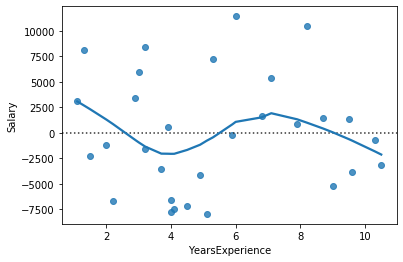

In [48]:
sns.residplot(X,Y , lowess = True , data = df)

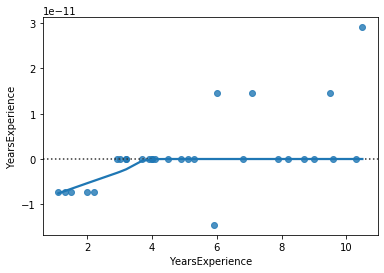

In [45]:
sns.residplot(X, Y_pred , lowess =True , data =df)

# Linear Regression by sklearn

In [46]:
df1 = pd.read_csv("Salary_Data.csv")
df1.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [47]:
from sklearn.linear_model import  LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [48]:
lr = LinearRegression()

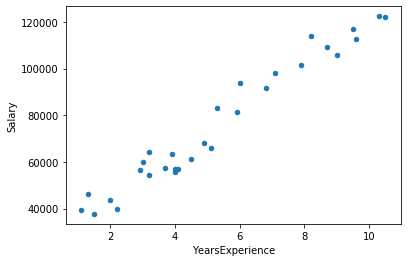

In [49]:
df.plot.scatter(x='YearsExperience', y='Salary')

# Regplot         
### regplot() performs a simple linear regression model fit and plot.

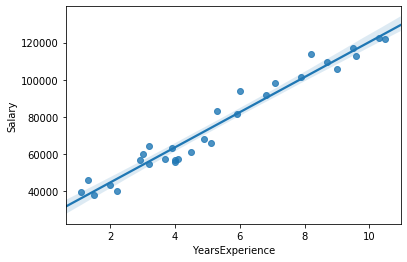

In [50]:
sns.regplot('YearsExperience', # Horizontal axis
           'Salary', # Vertical axis
           data=df)

In [51]:
x = df1.drop(["Salary"], axis=1)
y = df1["Salary"]

In [52]:
print(x.shape)
print(y.shape)

(30, 1)
(30,)


In [53]:
x_train,x_test,y_train,y_test = train_test_split(x,y , test_size = 0.3 , random_state =42)

In [54]:
lr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
pred = lr.predict(x_test)
pred

array([116511.83848464,  72097.0155738 , 103281.8912346 ,  75877.00050238,
        56032.07962732,  60757.06078805, 123126.81210966, 108006.87239533,
        63592.04948449])

In [56]:
lr.score(x_test,y_test)

0.9439865571980841

### intercept

In [57]:
print(lr.intercept_)

25792.20019866871


### coefficient

In [58]:
print(lr.coef_)

[9449.96232146]


In [61]:
df2 = pd.DataFrame({'Actual': y_test , 'Predict': pred})
df2.shape

(9, 2)